# Optimization for Logistic Regression

The following blog post will implement gradient descent for logistic regression in an object-oriented paradigm and implement a key variant of gradient descent called stochastic gradient descent. It will then perform several simple experiments on synthetic data to see which of these algorithms converges most quickly to a satisfactory logistic regression model.

To view the source code, pelase follow this link: https://github.com/madgallop/madgallop.github.io/blob/main/posts/regression_blog/logistic.py

### Introduction

Linear regression is an approach to modeling the relationship between independent variable/s and a dependent variable. It is the best-fit regression line to describes data with minimal error, as measured by loss. Gradient descent and the algorithm in this blogpost aim to minimize the loss function. 

### Approach to implementating the algorithm

In order to implement this algorithm, I built up tools and concepts we discussed in class. I used functions from the lecture on Convex Linear Models and Logistic Regression (predict, sigmoid, loss), and adapted the score method from the perceptron blogpost. The primary challenge of this assignment was implementing the gradient. I first time to spend some time figuring out what the gradient descent function actually is for linear regression. I first tried to implement a partial deriatives approach to find the slope and intercept, but eventaully found the key to be in equation below from the Optimization with Gradient Descent lecture. I finally understood what is happening in gradient descent of logisitic regression, and was able to replicate the equation in code. 

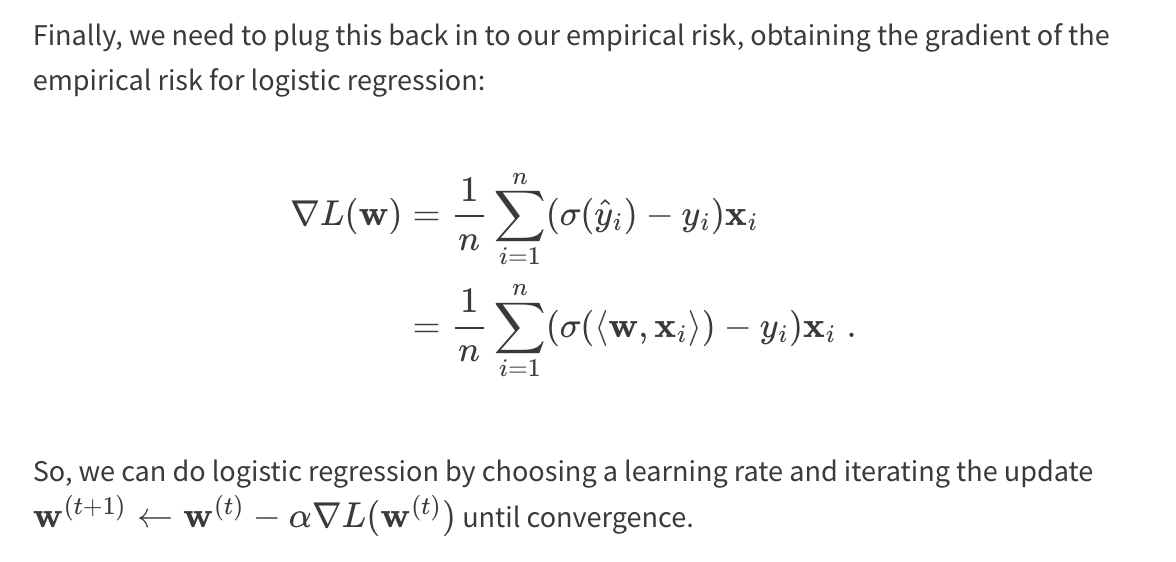

The other challenging part of this assignment was formatting vectors and matrices to have dimensions that allowed for multiplication and other operations. I had to always be asking myself what dimension matrices certain lines of code (like the gradient) were taking in and spitting out, and adjusting the algorithm with lines such as y[:,np.newaxis] and .T to transform matrices. 

### Implementation

Before beginning, import all the required packages:

In [155]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

Script to autoload logistic.py file 

In [154]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gradient descent

Visualize the example data

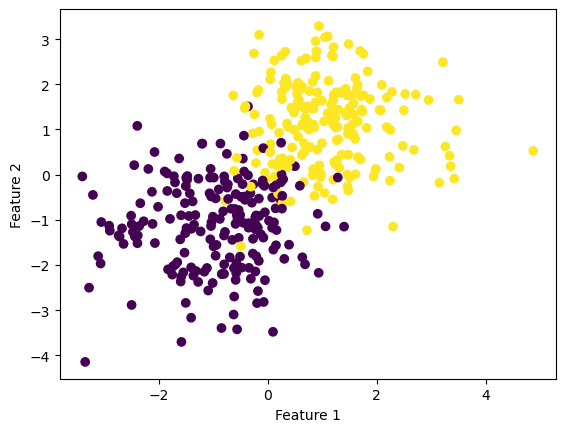

In [156]:
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


Now, fit the model

[[ 2.01961227]
 [ 2.46881413]
 [-0.32132074]]
(3, 1)


Text(0.5, 1.0, 'Gradient Descent')

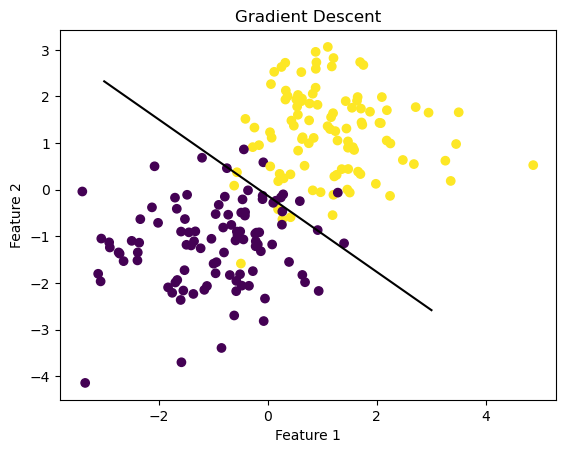

In [173]:
from logistic import LogisticRegression 
LR = LogisticRegression()
LR.fit(X, y, alpha = 1, max_epochs = 1000)

# inspect the fitted value of w
print(LR.w)

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)
print(LR.w.shape)

plt.plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")
plt.title("Gradient Descent")


As you can see, the model performs fairly well. Let's take a look at the evolution of the loss over time, as well as the overall accuracy. 

Text(0.5, 1.0, 'Loss History of Gradient Descent')

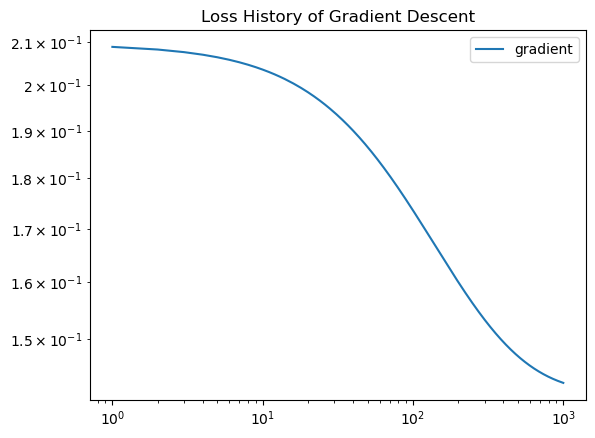

In [184]:
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 
plt.title("Loss History of Gradient Descent")

In [167]:
LR.score(X,y)

0.95

Gradient descent computes a fairly accurate value of the parameter vector w. Because the algorithm mainly utilized numpy operations instead of loops, it is efficient, and as the loss history graph depicts, starts to converge. Let's see if we can improve upon this algorithm by altering batch size! 

### Stochastic gradient descent

Stochastic gradient descent computes the stochastic gradient by computing the gradient on subsets of the data. The algorithm works as follows: 
1. Shuffle the points randomly.
2. Pick the first k random points, compute the stochastic gradient, and then perform an update.
3. Pick the next k random points and repeat..
4. When we have gone through all n points, reshuffle them all randomly and proceed again.

[[1.38594862]
 [1.58157147]
 [0.35018386]]


Text(0.5, 1.0, 'Stochastic Gradient Descent')

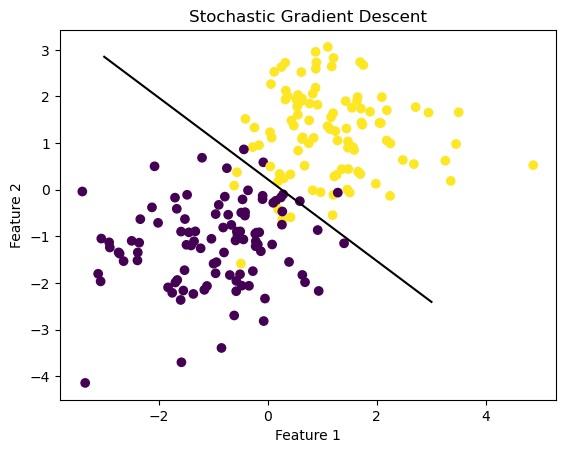

In [289]:
LR2 = LogisticRegression()
LR2.fit_stochastic(X, y, 
                  alpha = .05, 
                  batch_size = 100,
                  m_epochs = 100
                  )
# inspect the fitted value of w
print(LR2.w)

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

plt.plot(f1, (LR2.w[2] - f1*LR2.w[0])/LR2.w[1], color = "black")
plt.title("Stochastic Gradient Descent")


The model fits the data quite well. Let's examine the loss history and accuracy again! 

Text(0.5, 1.0, 'Loss History Stochastic Gradient Descent')

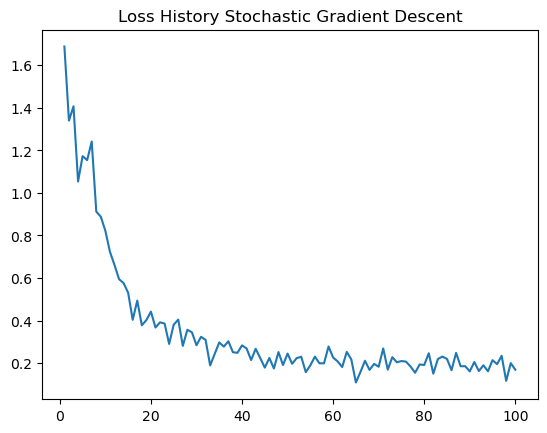

In [290]:
num_steps = len(LR2.loss_history)
plt.plot(np.arange(num_steps) + 1, LR2.loss_history, label = "stochastic gradient")
plt.title("Loss History Stochastic Gradient Descent")


In [170]:
LR2.score(X,y)

0.935

The loss history chart bounces around more than for typical gradient descent, but gives us a good sense of how the stochastic gradient affects the regression over time. The algorithm is quite accurate as well! As I've learned, stochastic gradient descent tends to get to a “pretty good” result faster than standard gradient descent, but can “bounce around” near the good solution. Standard gradient descent might need more epochs to find a good solution, but quickly “settles down” once it finds it.

### Example 1: the effect of a large learning rate 

[Text(0.5, 0, 'Iteration number'),
 Text(0, 0.5, 'Empirical Risk'),
 Text(0.5, 1.0, '100')]

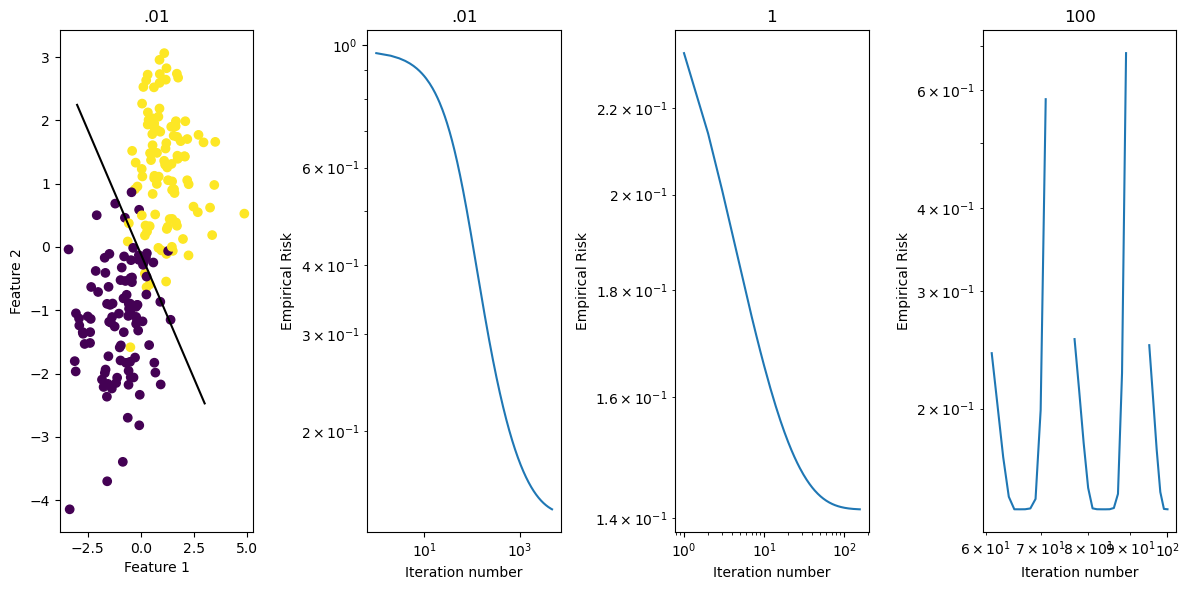

In [267]:
LR_01 = LogisticRegression()

LR_01.fit(X, y, alpha = .01, max_epochs = 10000)
num_steps01 = len(LR_01.loss_history)

LR_1 = LogisticRegression()

LR_1.fit(X, y, alpha = 1, max_epochs = 1000)
num_steps1 = len(LR_1.loss_history)

LR_100 = LogisticRegression()

LR_100.fit(X, y, alpha = 100, max_epochs = 100)
num_steps100 = len(LR_100.loss_history)


fig, axarr = plt.subplots(1,4, layout = "tight", figsize = (12,6))

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = ".01")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR_01.w[2] - f1*LR_01.w[0])/LR_01.w[1], color = "black")

axarr[1].plot(np.arange(num_steps01) + 1, LR_01.loss_history, label = "Loss alpha = .01")
axarr[1].loglog()
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = ".01")

axarr[2].plot(np.arange(num_steps1) + 1, LR_1.loss_history, label = "Loss alpha = 1")
axarr[2].loglog()
axarr[2].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "1")

axarr[3].plot(np.arange(num_steps100) + 1, LR_100.loss_history, label = "Loss alpha = 100")
axarr[3].loglog()
axarr[3].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "100")


This example illustrates the loss history for different learning rate choices. When the learning rate is small, the algorithm converges relatively slowely. With a larger alpha value (such as 1), the algorithm converges with fewer iterations, and in a more direct manner. And when alpha is very large, say, 100, the algorithm fails to converge, and fails rather fast. 

### Example 2: the effect of varying the batch size 

Create a new data set with 10 features 

In [293]:
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

Run stochastic gradient descent, investigating how choice of batch size affects how fast the algorithm converges

[Text(0.5, 0, 'Iteration number'),
 Text(0, 0.5, 'Empirical Risk'),
 Text(0.5, 1.0, '5000')]

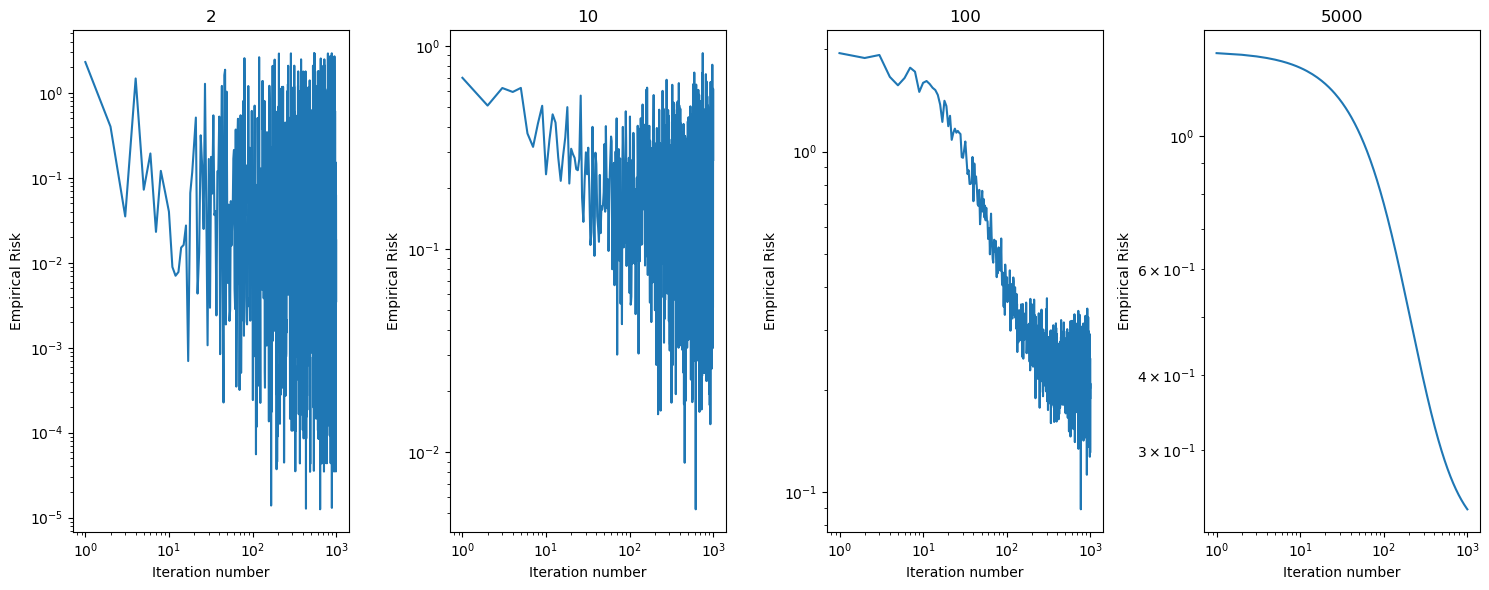

In [302]:
LR_ex2 = LogisticRegression()
LR_ex2.fit_stochastic(X, y, alpha = .01, batch_size = 2, m_epochs = 1000)
num_steps2 = len(LR_ex2.loss_history)

LR_ex10 = LogisticRegression()
LR_ex10.fit_stochastic(X, y, alpha = .01, batch_size = 10, m_epochs = 1000)
num_steps10 = len(LR_ex10.loss_history)

LR_ex100 = LogisticRegression()
LR_ex100.fit_stochastic(X, y, alpha = .01, batch_size = 100, m_epochs = 1000)
num_steps100 = len(LR_ex100.loss_history)

LR_ex5000 = LogisticRegression()
LR_ex5000.fit_stochastic(X, y, alpha = .01, batch_size = 5000, m_epochs = 1000)
num_steps5000 = len(LR_ex5000.loss_history)


fig, axarr = plt.subplots(1,4, layout = "tight", figsize = (15,6))

axarr[0].plot(np.arange(num_steps2) + 1, LR_ex2.loss_history, label = "2")
axarr[0].loglog()
axarr[0].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "2")

axarr[1].plot(np.arange(num_steps10) + 1, LR_ex10.loss_history, label = "Loss alpha = 10")
axarr[1].loglog()
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "10")

axarr[2].plot(np.arange(num_steps100) + 1, LR_ex100.loss_history, label = "Loss alpha = 100")
axarr[2].loglog()
axarr[2].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "100")

axarr[3].plot(np.arange(num_steps5000) + 1, LR_ex5000.loss_history, label = "Loss alpha = 5000")
axarr[3].loglog()
axarr[3].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "5000")


As the batch size increases, the model works through more training samples before updating its parameters. Thus, really large batch sizes converge faster without as much "bouncing" as compared to smaller batch sizes. While still displaying a downward trend, smaller batch sizes bounce around much more and converge at a slower rate. 